Link Datasets [click_here](https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset)

This dataset is collected from National Health Insurance Service in Korea. All personal information and sensitive data were excluded.
The purpose of this dataset is to:

Analysis of body signal
Classification of smoker or drinker
Details of dataset:


Colunm	Description(US)	KR

Sex	male, female	성별

age	round up to 5 years	나이

height	round up to 5 cm[cm]	키

weight	[kg]	몸무게

sight_left	eyesight(left)	시력(좌)

sight_right	eyesight(right)	시력(우)

hear_left	hearing left, 1(normal), 2(abnormal)	청력

hear_right	hearing right, 1(normal), 2(abnormal)	청력

SBP	Systolic blood pressure[mmHg]	수축기 혈압

DBP	Diastolic blood pressure[mmHg]	이완기 혈압

BLDS	BLDS or FSG(fasting blood glucose)[mg/dL]	공복혈당

tot_chole	total cholesterol[mg/dL]	총 콜레스테롤

HDL_chole	HDL cholesterol[mg/dL]	HDL 콜레스테롤

LDL_chole	LDL cholesterol[mg/dL]	LDL 콜레스테롤

triglyceride	triglyceride[mg/dL]	중성지방

hemoglobin	hemoglobin[g/dL]	헤모글로빈

urine_protein	protein in urine, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)	요단백 또는
단백뇨
serum_creatinine	serum(blood) creatinine[mg/dL]	혈청 크레아티닌

SGOT_AST	SGOT(Glutamate-oxaloacetate transaminase) AST(Aspartate transaminase)[IU/L]	혈청지오티 AST

SGOT_ALT	ALT(Alanine transaminase)[IU/L]	혈청지오티 ALT

gamma_GTP	y-glutamyl transpeptidase[IU/L]	감마지티피

SMK_stat_type_cd	Smoking state, 1(never), 2(used to smoke but quit), 3(still smoke)	흡연상태

DRK_YN	Drinker or Not	음주여부

### IMPORT MODULE

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import keras

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras import Sequential
sns.set()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
data = pd.read_csv("/kaggle/input/smoking-drinking-dataset/smoking_driking_dataset_Ver01.csv")
data

sex  age  height  weight  waistline  sight_left  sight_right  \
0         Male   35     170      75       90.0         1.0          1.0   
1         Male   30     180      80       89.0         0.9          1.2   
2         Male   40     165      75       91.0         1.2          1.5   
3         Male   50     175      80       91.0         1.5          1.2   
4         Male   50     165      60       80.0         1.0          1.2   
...        ...  ...     ...     ...        ...         ...          ...   
991341    Male   45     175      80       92.1         1.5          1.5   
991342    Male   35     170      75       86.0         1.0          1.5   
991343  Female   40     155      50       68.0         1.0          0.7   
991344    Male   25     175      60       72.0         1.5          1.0   
991345    Male   50     160      70       90.5         1.0          1.5   

        hear_left  hear_right    SBP  ...  LDL_chole  triglyceride  \
0             1.0         1.0  120.0  ...      126.0          92.0   
1             1.0         1.0  130.0  ...      148.0         121.0   
2             1.0         1.0  120.0  ...       74.0         104.0   
3             1.0         1.0  145.0  ...      104.0         106.0   
4             1.0         1.0  138.0  ...      117.0         104.0   
...           ...         ...    ...  ...        ...           ...   
991341        1.0         1.0  114.0  ...      125.0         132.0   
991342        1.0         1.0  119.0  ...       84.0          45.0   
991343        1.0         1.0  110.0  ...       77.0         157.0   
991344        1.0         1.0  119.0  ...       73.0          53.0   
991345        1.0         1.0  133.0  ...      153.0         163.0   

        hemoglobin  urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  \
0             17.1            1.0               1.0      21.0      35.0   
1             15.8            1.0               0.9      20.0      36.0   
2             15.8            1.0               0.9      47.0      32.0   
3             17.6            1.0               1.1      29.0      34.0   
4             13.8            1.0               0.8      19.0      12.0   
...            ...            ...               ...       ...       ...   
991341        15.0            1.0               1.0      26.0      36.0   
991342        15.8            1.0               1.1      14.0      17.0   
991343        14.3            1.0               0.8      30.0      27.0   
991344        14.5            1.0               0.8      21.0      14.0   
991345        15.8            1.0               0.9      24.0      43.0   

        gamma_GTP  SMK_stat_type_cd  DRK_YN  
0            40.0               1.0       Y  
1            27.0               3.0       N  
2            68.0               1.0       N  
3            18.0               1.0       N  
4            25.0               1.0       N  
...           ...               ...     ...  
991341       27.0               1.0       N  
991342       15.0               1.0       N  
991343       17.0               3.0       Y  
991344       17.0               1.0       N  
991345       36.0               3.0       Y  

[991346 rows x 24 columns]

In [ ]:
data.iloc[:, :20]

sex  age  height  weight  waistline  sight_left  sight_right  \
0         Male   35     170      75       90.0         1.0          1.0   
1         Male   30     180      80       89.0         0.9          1.2   
2         Male   40     165      75       91.0         1.2          1.5   
3         Male   50     175      80       91.0         1.5          1.2   
4         Male   50     165      60       80.0         1.0          1.2   
...        ...  ...     ...     ...        ...         ...          ...   
991341    Male   45     175      80       92.1         1.5          1.5   
991342    Male   35     170      75       86.0         1.0          1.5   
991343  Female   40     155      50       68.0         1.0          0.7   
991344    Male   25     175      60       72.0         1.5          1.0   
991345    Male   50     160      70       90.5         1.0          1.5   

        hear_left  hear_right    SBP   DBP   BLDS  tot_chole  HDL_chole  \
0             1.0         1.0  120.0  80.0   99.0      193.0       48.0   
1             1.0         1.0  130.0  82.0  106.0      228.0       55.0   
2             1.0         1.0  120.0  70.0   98.0      136.0       41.0   
3             1.0         1.0  145.0  87.0   95.0      201.0       76.0   
4             1.0         1.0  138.0  82.0  101.0      199.0       61.0   
...           ...         ...    ...   ...    ...        ...        ...   
991341        1.0         1.0  114.0  80.0   88.0      198.0       46.0   
991342        1.0         1.0  119.0  83.0   83.0      133.0       40.0   
991343        1.0         1.0  110.0  70.0   90.0      205.0       96.0   
991344        1.0         1.0  119.0  74.0   69.0      122.0       38.0   
991345        1.0         1.0  133.0  79.0   99.0      225.0       39.0   

        LDL_chole  triglyceride  hemoglobin  urine_protein  serum_creatinine  \
0           126.0          92.0        17.1            1.0               1.0   
1           148.0         121.0        15.8            1.0               0.9   
2            74.0         104.0        15.8            1.0               0.9   
3           104.0         106.0        17.6            1.0               1.1   
4           117.0         104.0        13.8            1.0               0.8   
...           ...           ...         ...            ...               ...   
991341      125.0         132.0        15.0            1.0               1.0   
991342       84.0          45.0        15.8            1.0               1.1   
991343       77.0         157.0        14.3            1.0               0.8   
991344       73.0          53.0        14.5            1.0               0.8   
991345      153.0         163.0        15.8            1.0               0.9   

        SGOT_AST  
0           21.0  
1           20.0  
2           47.0  
3           29.0  
4           19.0  
...          ...  
991341      26.0  
991342      14.0  
991343      30.0  
991344      21.0  
991345      24.0  

[991346 rows x 20 columns]

In [ ]:
data.describe()

age         height         weight      waistline  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean       47.614491     162.240625      63.284050      81.233358   
std        14.181339       9.282957      12.514241      11.850323   
min        20.000000     130.000000      25.000000       8.000000   
25%        35.000000     155.000000      55.000000      74.100000   
50%        45.000000     160.000000      60.000000      81.000000   
75%        60.000000     170.000000      70.000000      87.800000   
max        85.000000     190.000000     140.000000     999.000000   

          sight_left    sight_right      hear_left     hear_right  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean        0.980834       0.978429       1.031495       1.030476   
std         0.605949       0.604774       0.174650       0.171892   
min         0.100000       0.100000       1.000000       1.000000   
25%         0.700000       0.700000       1.000000       1.000000   
50%         1.000000       1.000000       1.000000       1.000000   
75%         1.200000       1.200000       1.000000       1.000000   
max         9.900000       9.900000       2.000000       2.000000   

                 SBP            DBP  ...      HDL_chole      LDL_chole  \
count  991346.000000  991346.000000  ...  991346.000000  991346.000000   
mean      122.432498      76.052627  ...      56.936800     113.037692   
std        14.543148       9.889365  ...      17.238479      35.842812   
min        67.000000      32.000000  ...       1.000000       1.000000   
25%       112.000000      70.000000  ...      46.000000      89.000000   
50%       120.000000      76.000000  ...      55.000000     111.000000   
75%       131.000000      82.000000  ...      66.000000     135.000000   
max       273.000000     185.000000  ...    8110.000000    5119.000000   

        triglyceride     hemoglobin  urine_protein  serum_creatinine  \
count  991346.000000  991346.000000  991346.000000     991346.000000   
mean      132.141751      14.229824       1.094224          0.860467   
std       102.196985       1.584929       0.437724          0.480530   
min         1.000000       1.000000       1.000000          0.100000   
25%        73.000000      13.200000       1.000000          0.700000   
50%       106.000000      14.300000       1.000000          0.800000   
75%       159.000000      15.400000       1.000000          1.000000   
max      9490.000000      25.000000       6.000000         98.000000   

            SGOT_AST       SGOT_ALT      gamma_GTP  SMK_stat_type_cd  
count  991346.000000  991346.000000  991346.000000     991346.000000  
mean       25.989308      25.755051      37.136347          1.608122  
std        23.493386      26.308599      50.424153          0.818507  
min         1.000000       1.000000       1.000000          1.000000  
25%        19.000000      15.000000      16.000000          1.000000  
50%        23.000000      20.000000      23.000000          1.000000  
75%        28.000000      29.000000      39.000000          2.000000  
max      9999.000000    7210.000000     999.000000          3.000000  

[8 rows x 22 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [ ]:
data.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

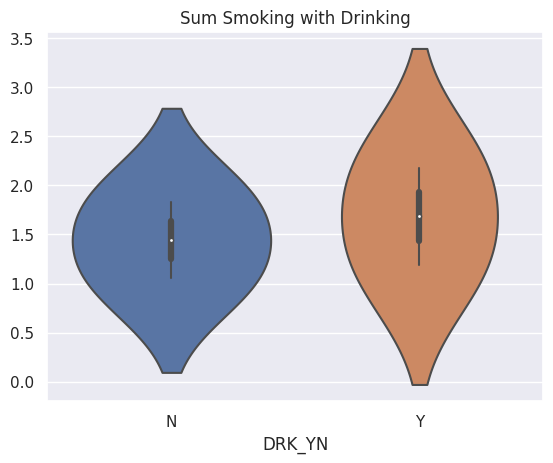

In [ ]:
sns.violinplot(pd.pivot_table(data=data, columns="DRK_YN", values="SMK_stat_type_cd", index="sex", aggfunc="mean")).set(title="Sum Smoking with Drinking");

<Axes: >

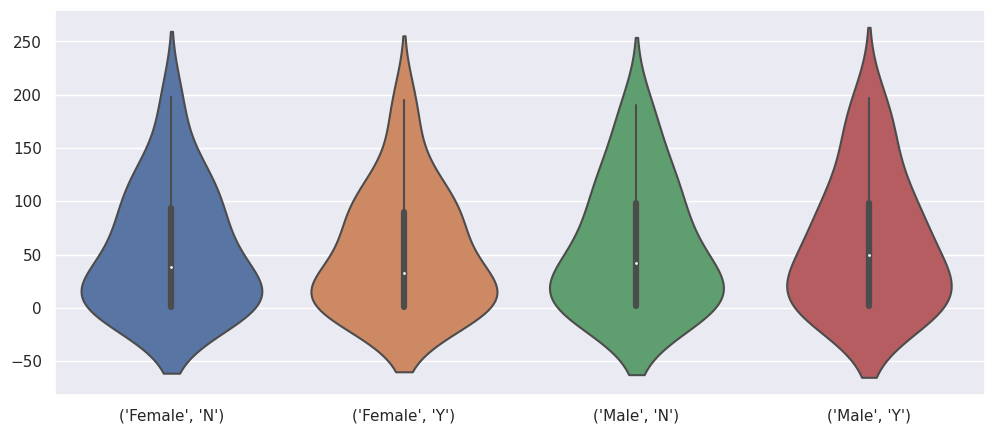

In [ ]:
plt.figure(figsize=(12,5))
z = data.groupby(["sex", "DRK_YN"]).mean().T
sns.violinplot(z)

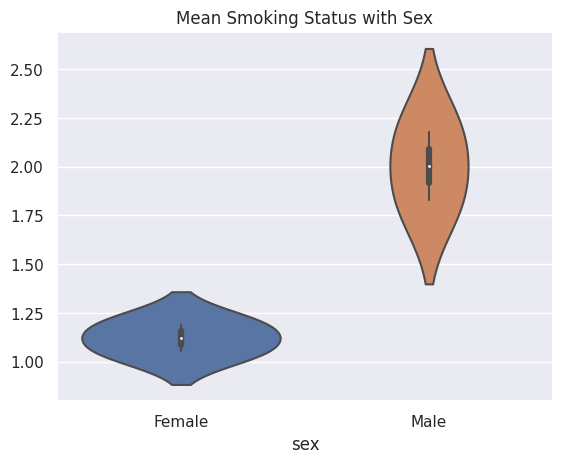

In [ ]:
sns.violinplot(pd.pivot_table(data, columns="sex", values="SMK_stat_type_cd", index="DRK_YN", aggfunc="mean")).set(title="Mean Smoking Status with Sex");

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


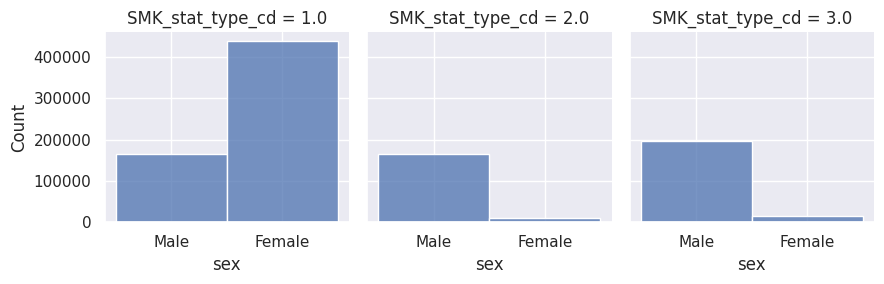

In [ ]:
g = sns.FacetGrid(data, col="SMK_stat_type_cd")
g.map(sns.histplot, "sex")

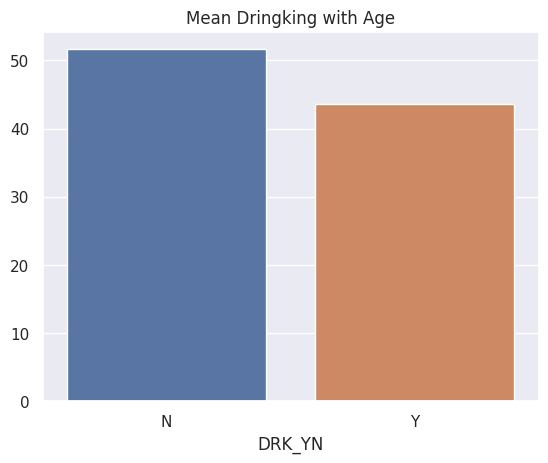

In [ ]:
sns.barplot(pd.pivot_table(data, columns="DRK_YN", values="age", aggfunc="mean")).set(title="Mean Dringking with Age");

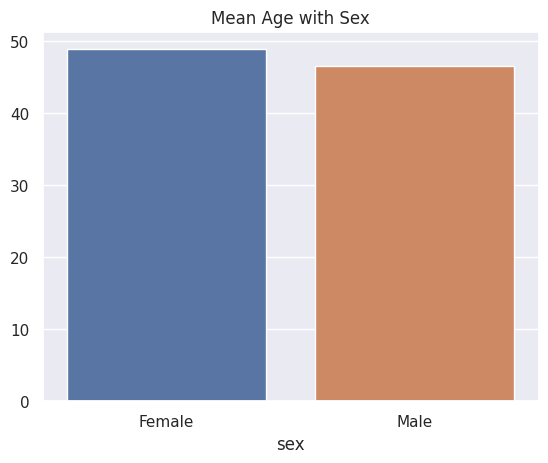

In [ ]:
sns.barplot(pd.pivot_table(data, columns="sex", values="age", aggfunc="mean")).set(title="Mean Age with Sex");

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


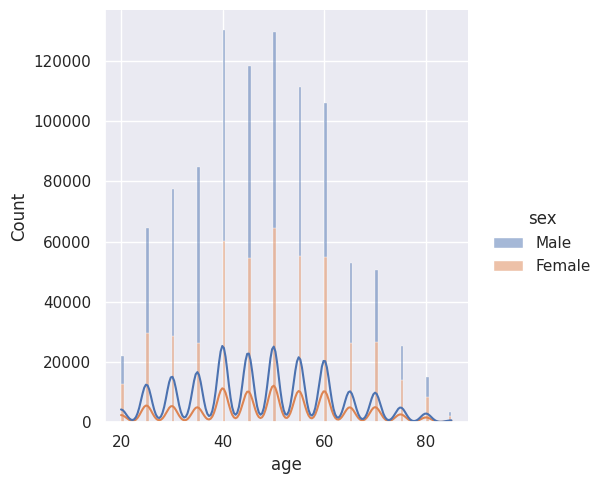

In [ ]:
sns.displot(data, x="age", hue="sex", multiple="stack", kde=True)

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/opt

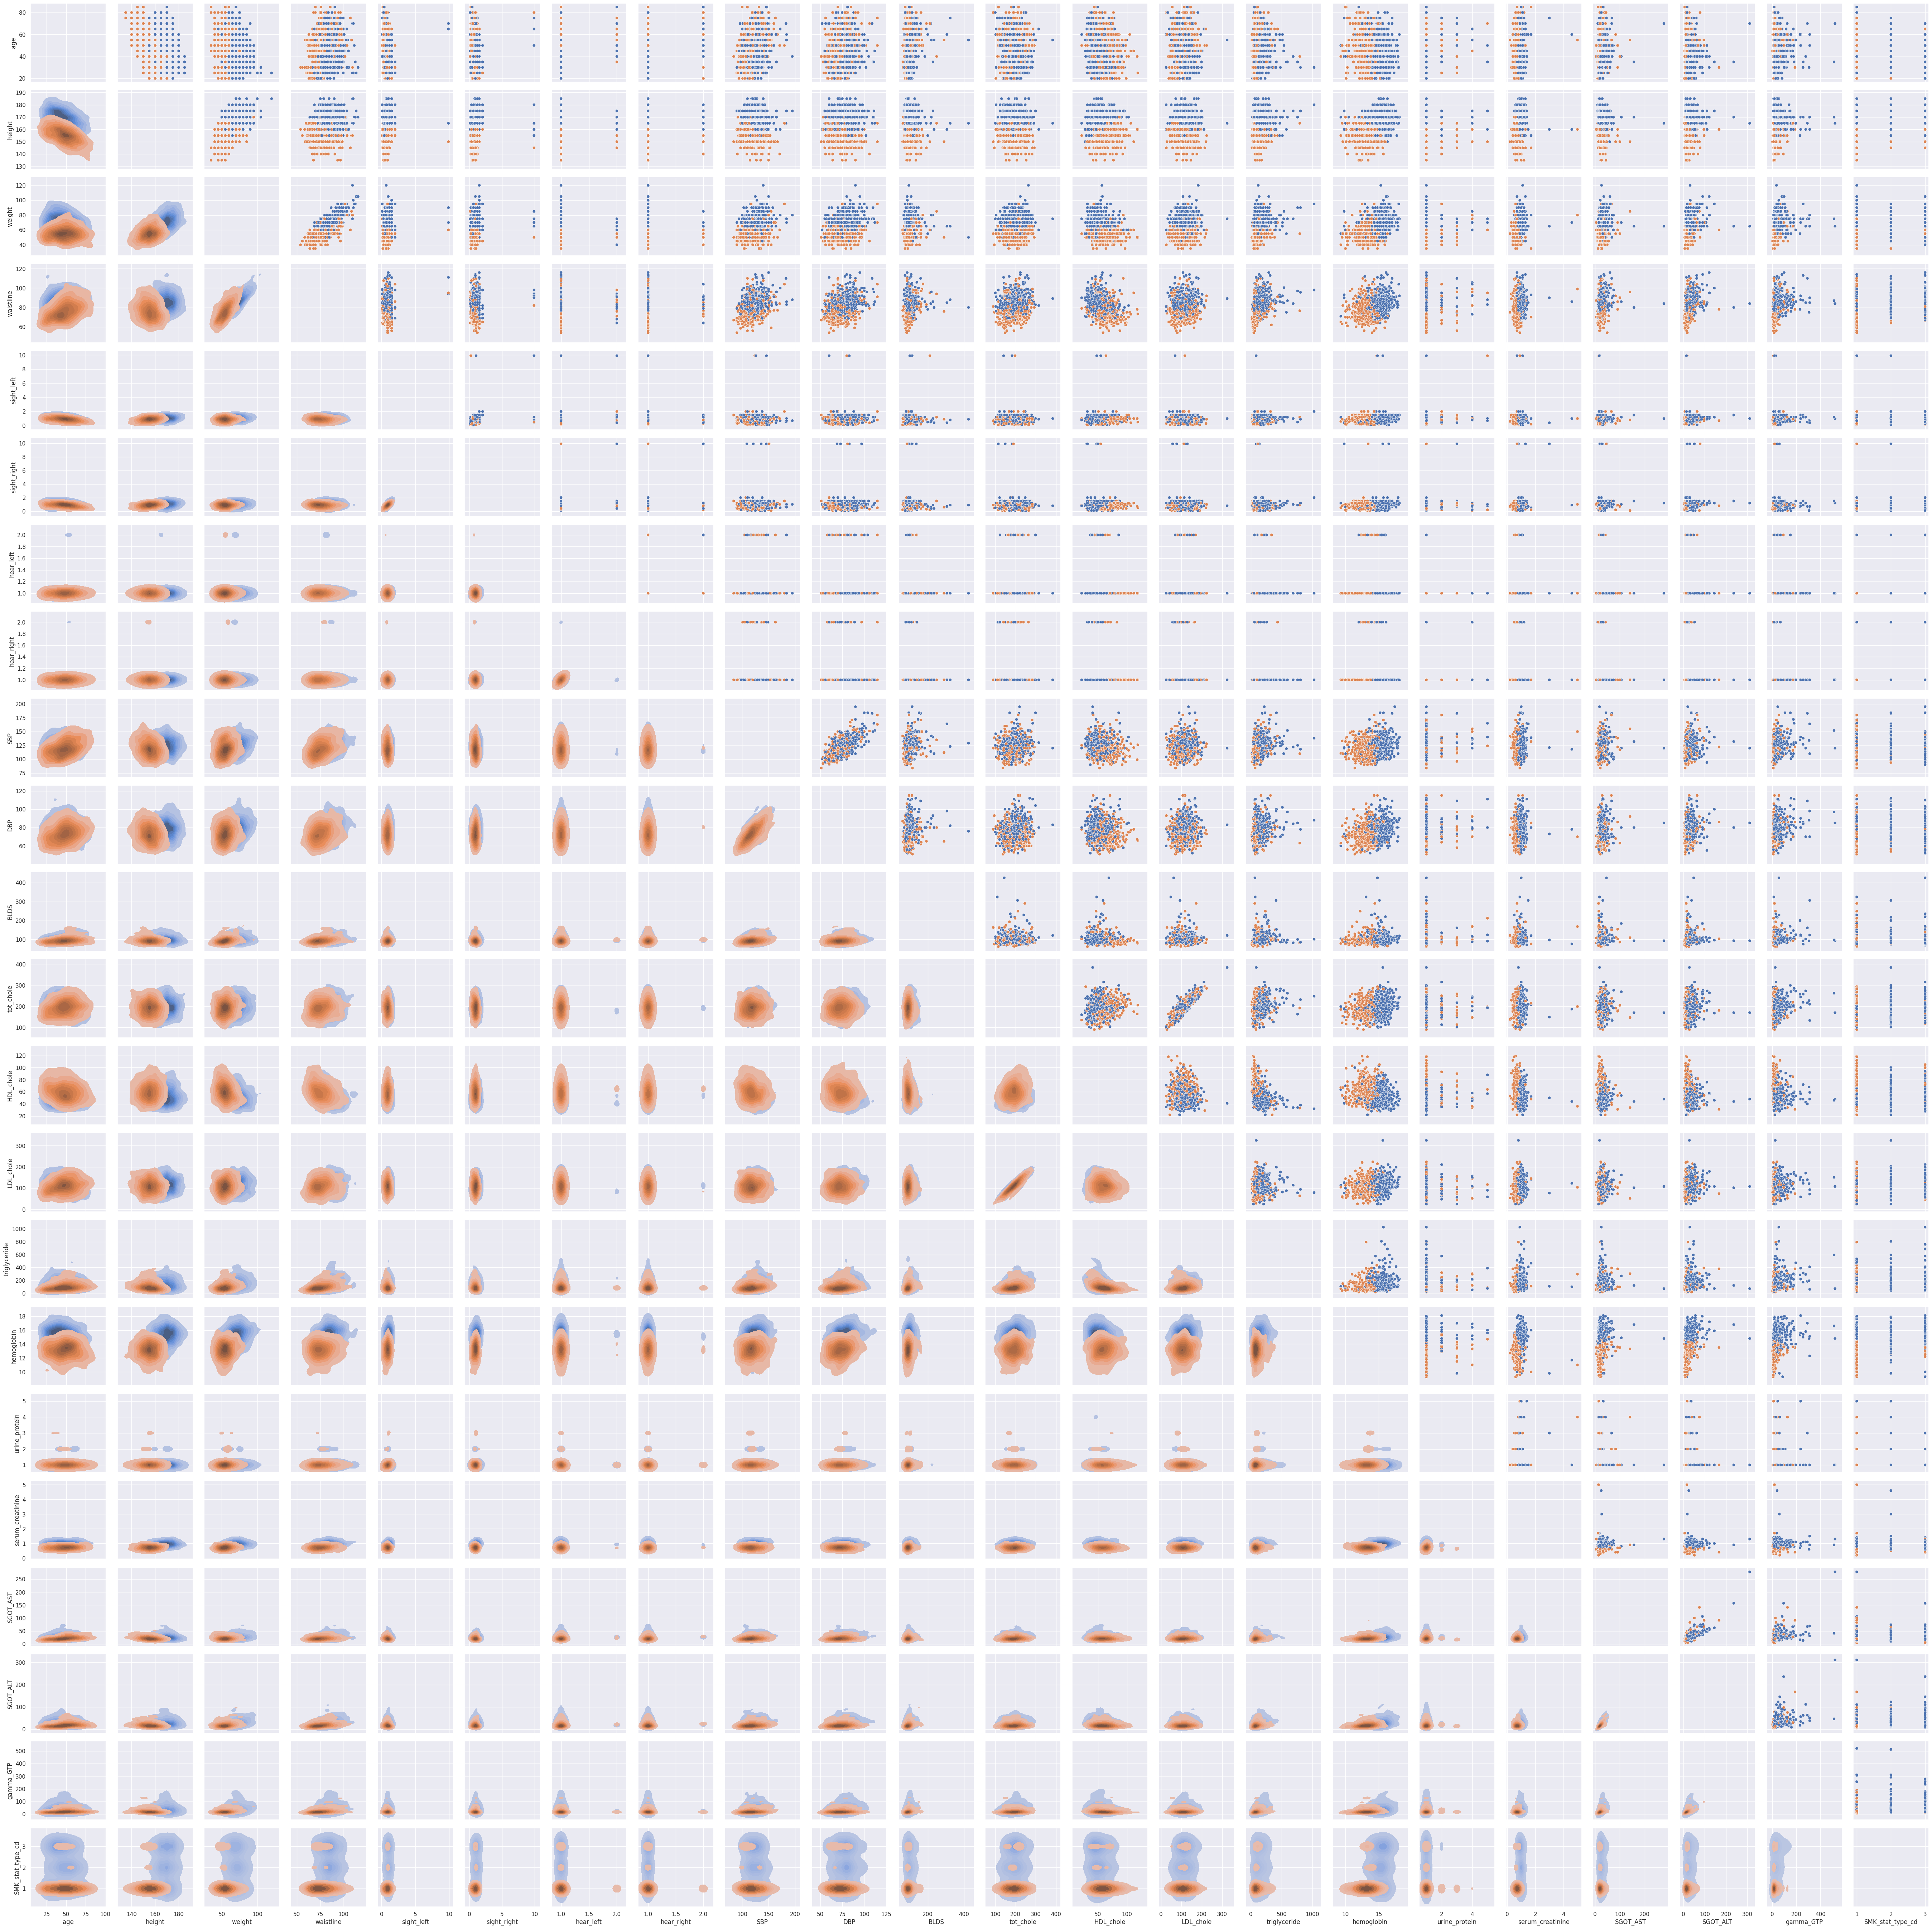

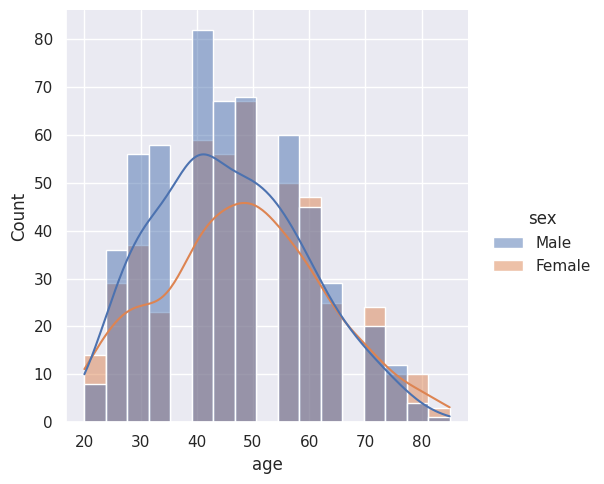

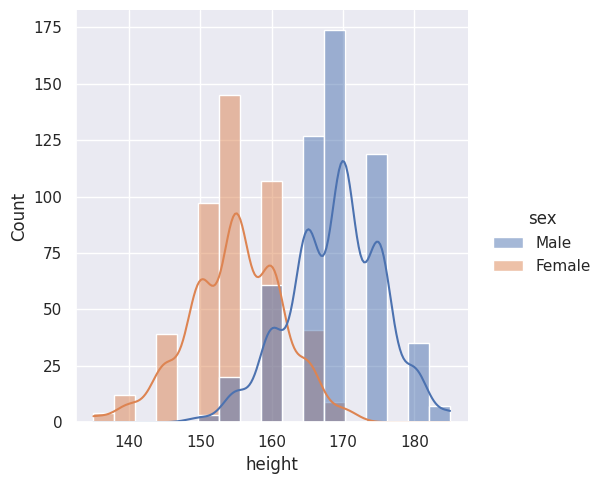

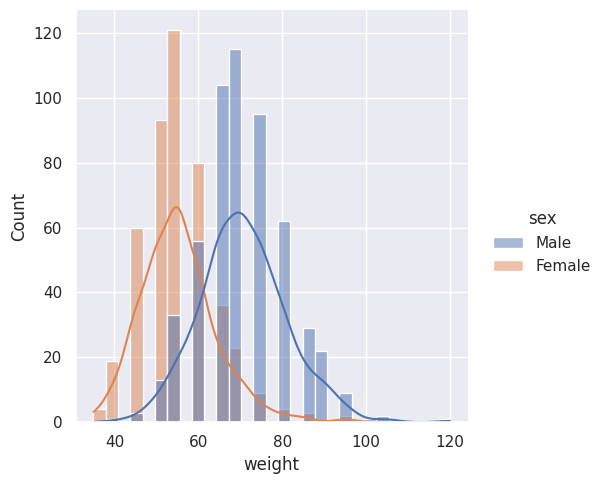

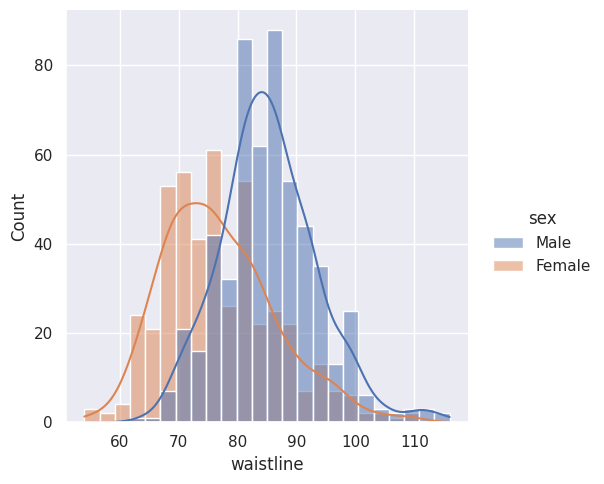

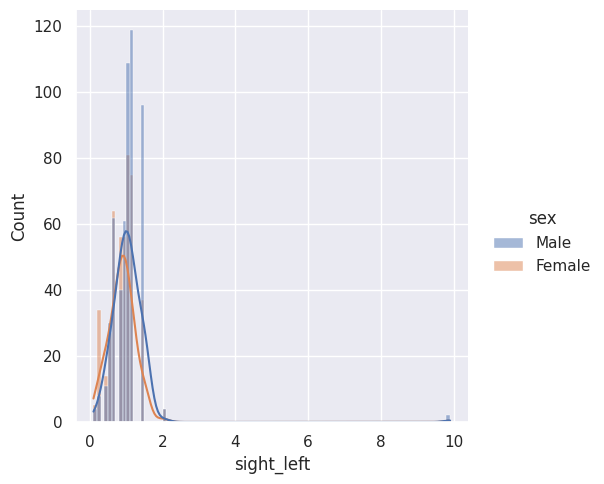

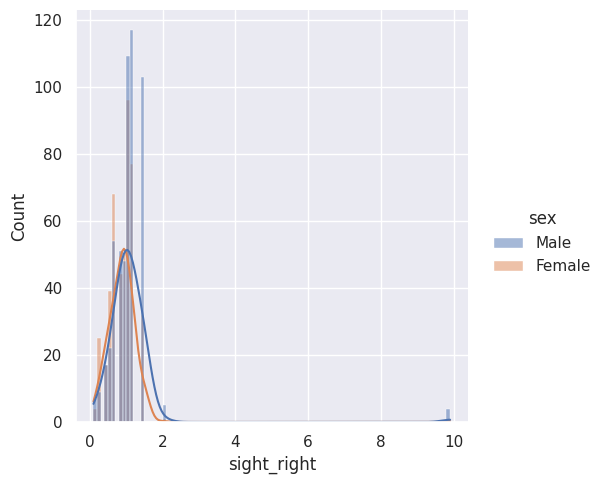

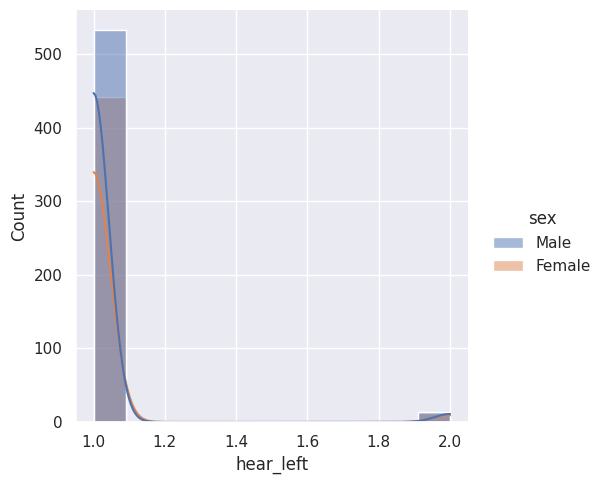

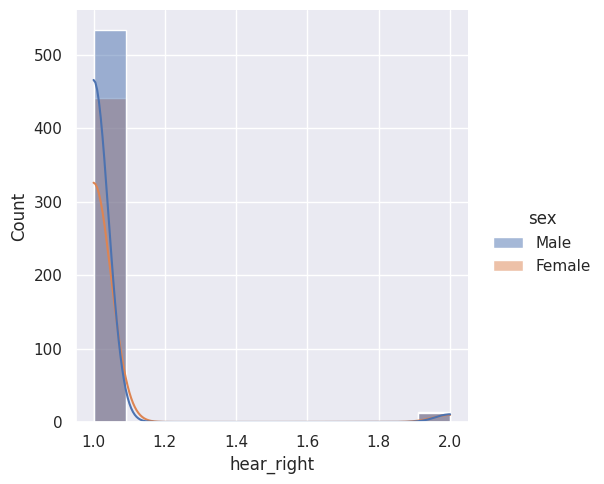

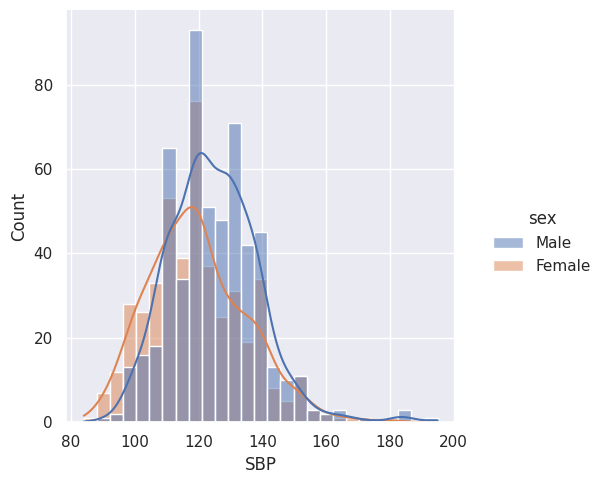

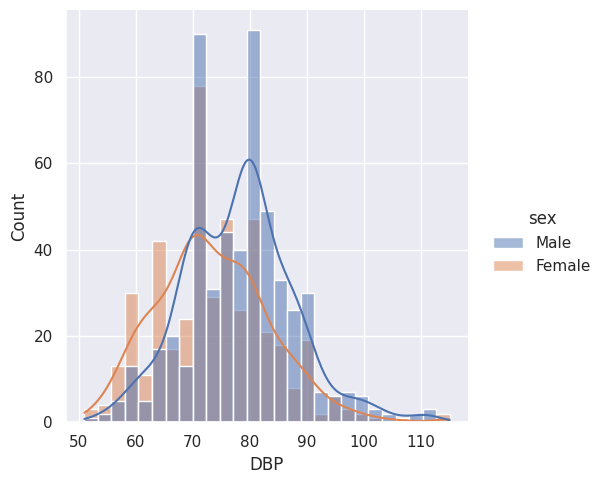

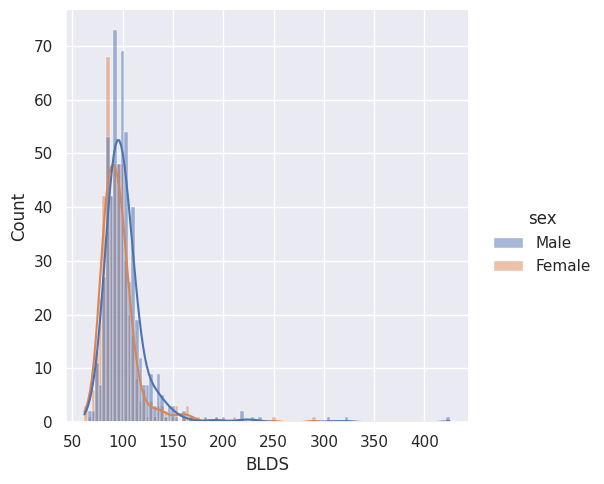

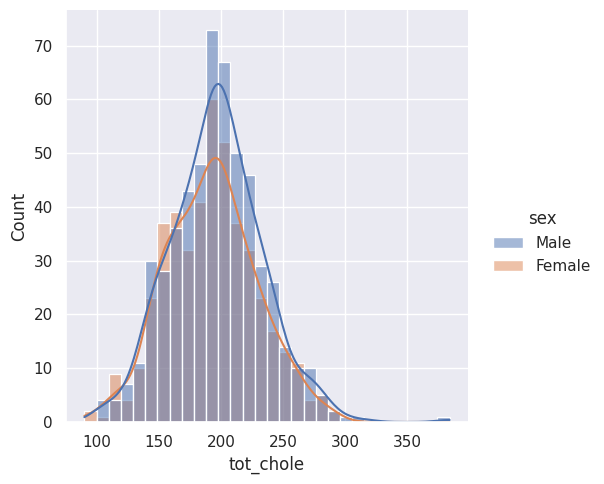

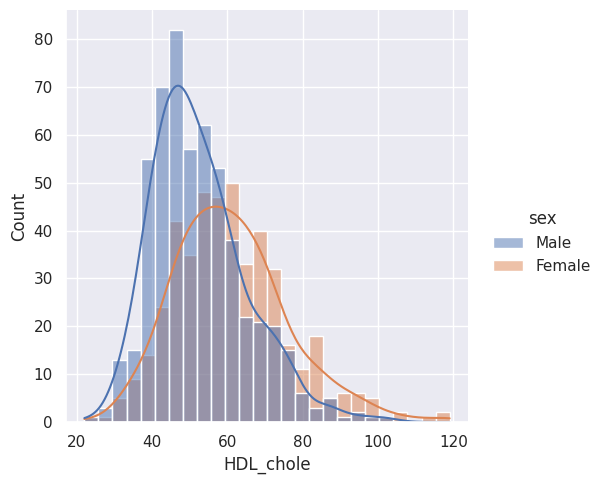

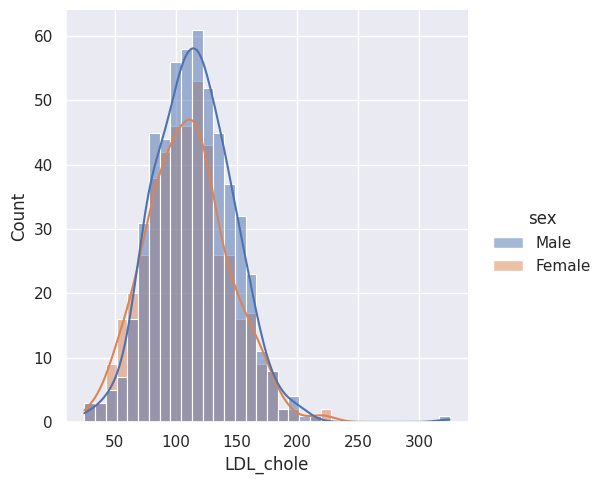

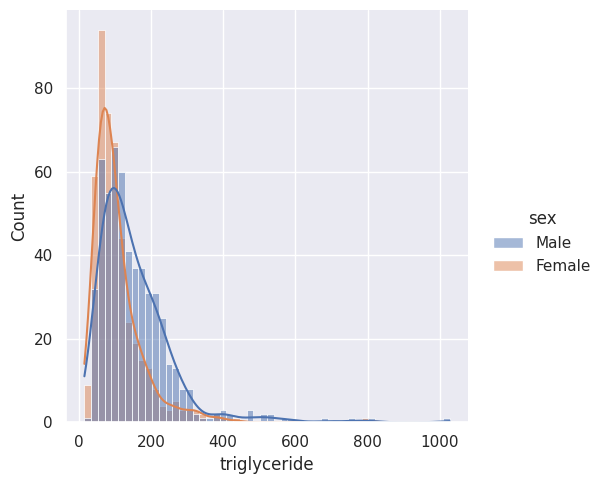

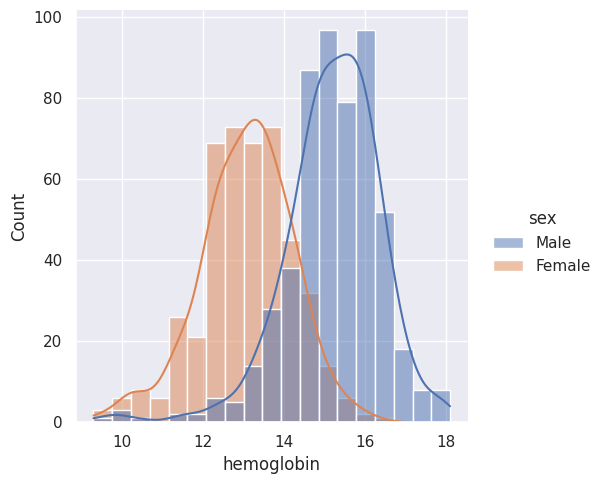

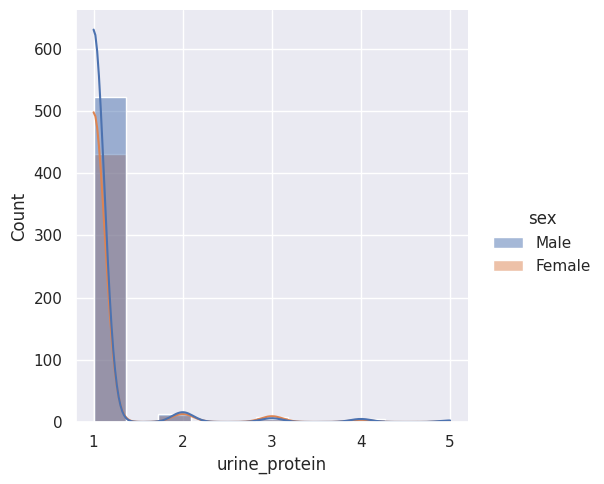

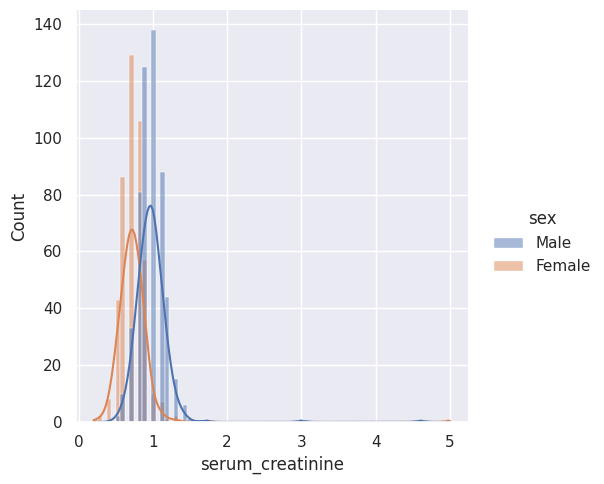

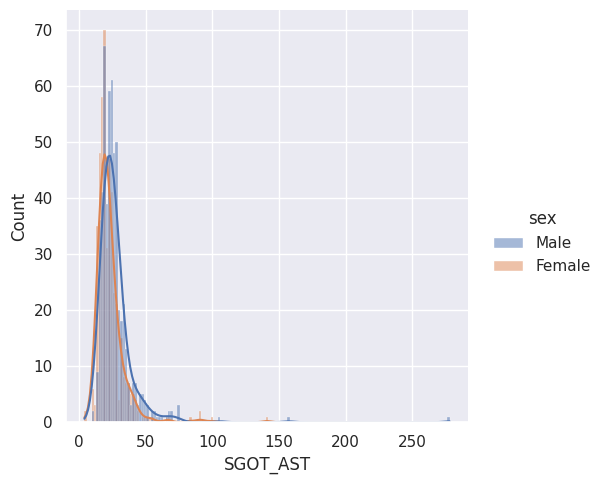

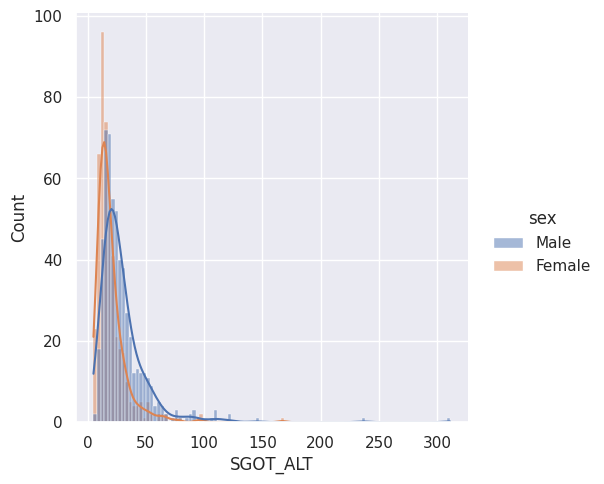

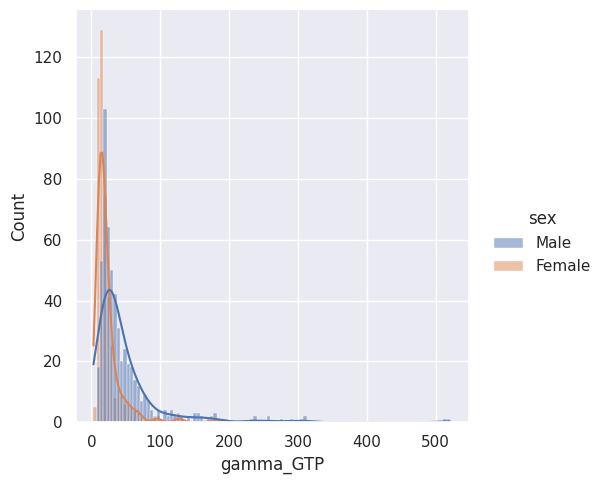

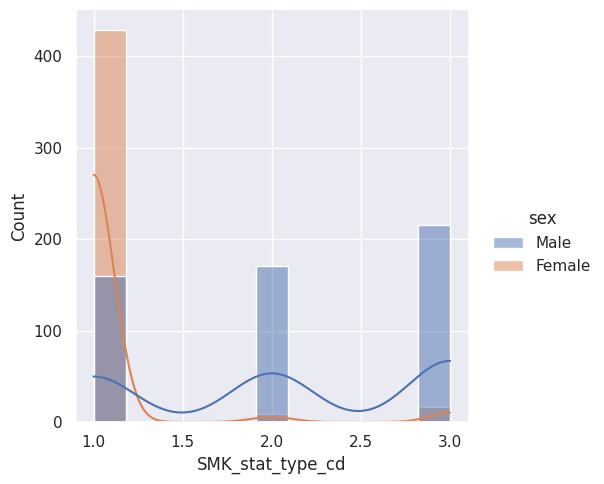

In [ ]:
g = sns.PairGrid(data[:1000], hue="sex") # Collect data to 1000, becuse the data is too big
g.map_upper(sns.scatterplot)
g.map_diag(sns.displot, kde=True)
g.map_lower(sns.kdeplot, fill=True)

In [ ]:
DRK_YN = LabelEncoder()
data["DRK_YN"] = DRK_YN.fit_transform(data["DRK_YN"])

sex = LabelEncoder()
data["sex"] = sex.fit_transform(data["sex"])
data

sex  age  height  weight  waistline  sight_left  sight_right  \
0         1   35     170      75       90.0         1.0          1.0   
1         1   30     180      80       89.0         0.9          1.2   
2         1   40     165      75       91.0         1.2          1.5   
3         1   50     175      80       91.0         1.5          1.2   
4         1   50     165      60       80.0         1.0          1.2   
...     ...  ...     ...     ...        ...         ...          ...   
991341    1   45     175      80       92.1         1.5          1.5   
991342    1   35     170      75       86.0         1.0          1.5   
991343    0   40     155      50       68.0         1.0          0.7   
991344    1   25     175      60       72.0         1.5          1.0   
991345    1   50     160      70       90.5         1.0          1.5   

        hear_left  hear_right    SBP  ...  LDL_chole  triglyceride  \
0             1.0         1.0  120.0  ...      126.0          92.0   
1             1.0         1.0  130.0  ...      148.0         121.0   
2             1.0         1.0  120.0  ...       74.0         104.0   
3             1.0         1.0  145.0  ...      104.0         106.0   
4             1.0         1.0  138.0  ...      117.0         104.0   
...           ...         ...    ...  ...        ...           ...   
991341        1.0         1.0  114.0  ...      125.0         132.0   
991342        1.0         1.0  119.0  ...       84.0          45.0   
991343        1.0         1.0  110.0  ...       77.0         157.0   
991344        1.0         1.0  119.0  ...       73.0          53.0   
991345        1.0         1.0  133.0  ...      153.0         163.0   

        hemoglobin  urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  \
0             17.1            1.0               1.0      21.0      35.0   
1             15.8            1.0               0.9      20.0      36.0   
2             15.8            1.0               0.9      47.0      32.0   
3             17.6            1.0               1.1      29.0      34.0   
4             13.8            1.0               0.8      19.0      12.0   
...            ...            ...               ...       ...       ...   
991341        15.0            1.0               1.0      26.0      36.0   
991342        15.8            1.0               1.1      14.0      17.0   
991343        14.3            1.0               0.8      30.0      27.0   
991344        14.5            1.0               0.8      21.0      14.0   
991345        15.8            1.0               0.9      24.0      43.0   

        gamma_GTP  SMK_stat_type_cd  DRK_YN  
0            40.0               1.0       1  
1            27.0               3.0       0  
2            68.0               1.0       0  
3            18.0               1.0       0  
4            25.0               1.0       0  
...           ...               ...     ...  
991341       27.0               1.0       0  
991342       15.0               1.0       0  
991343       17.0               3.0       1  
991344       17.0               1.0       0  
991345       36.0               3.0       1  

[991346 rows x 24 columns]

In [ ]:
data

sex  age  height  weight  waistline  sight_left  sight_right  \
0         1   35     170      75       90.0         1.0          1.0   
1         1   30     180      80       89.0         0.9          1.2   
2         1   40     165      75       91.0         1.2          1.5   
3         1   50     175      80       91.0         1.5          1.2   
4         1   50     165      60       80.0         1.0          1.2   
...     ...  ...     ...     ...        ...         ...          ...   
991341    1   45     175      80       92.1         1.5          1.5   
991342    1   35     170      75       86.0         1.0          1.5   
991343    0   40     155      50       68.0         1.0          0.7   
991344    1   25     175      60       72.0         1.5          1.0   
991345    1   50     160      70       90.5         1.0          1.5   

        hear_left  hear_right    SBP  ...  LDL_chole  triglyceride  \
0             1.0         1.0  120.0  ...      126.0          92.0   
1             1.0         1.0  130.0  ...      148.0         121.0   
2             1.0         1.0  120.0  ...       74.0         104.0   
3             1.0         1.0  145.0  ...      104.0         106.0   
4             1.0         1.0  138.0  ...      117.0         104.0   
...           ...         ...    ...  ...        ...           ...   
991341        1.0         1.0  114.0  ...      125.0         132.0   
991342        1.0         1.0  119.0  ...       84.0          45.0   
991343        1.0         1.0  110.0  ...       77.0         157.0   
991344        1.0         1.0  119.0  ...       73.0          53.0   
991345        1.0         1.0  133.0  ...      153.0         163.0   

        hemoglobin  urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  \
0             17.1            1.0               1.0      21.0      35.0   
1             15.8            1.0               0.9      20.0      36.0   
2             15.8            1.0               0.9      47.0      32.0   
3             17.6            1.0               1.1      29.0      34.0   
4             13.8            1.0               0.8      19.0      12.0   
...            ...            ...               ...       ...       ...   
991341        15.0            1.0               1.0      26.0      36.0   
991342        15.8            1.0               1.1      14.0      17.0   
991343        14.3            1.0               0.8      30.0      27.0   
991344        14.5            1.0               0.8      21.0      14.0   
991345        15.8            1.0               0.9      24.0      43.0   

        gamma_GTP  SMK_stat_type_cd  DRK_YN  
0            40.0               1.0       1  
1            27.0               3.0       0  
2            68.0               1.0       0  
3            18.0               1.0       0  
4            25.0               1.0       0  
...           ...               ...     ...  
991341       27.0               1.0       0  
991342       15.0               1.0       0  
991343       17.0               3.0       1  
991344       17.0               1.0       0  
991345       36.0               3.0       1  

[991346 rows x 24 columns]

<Axes: >

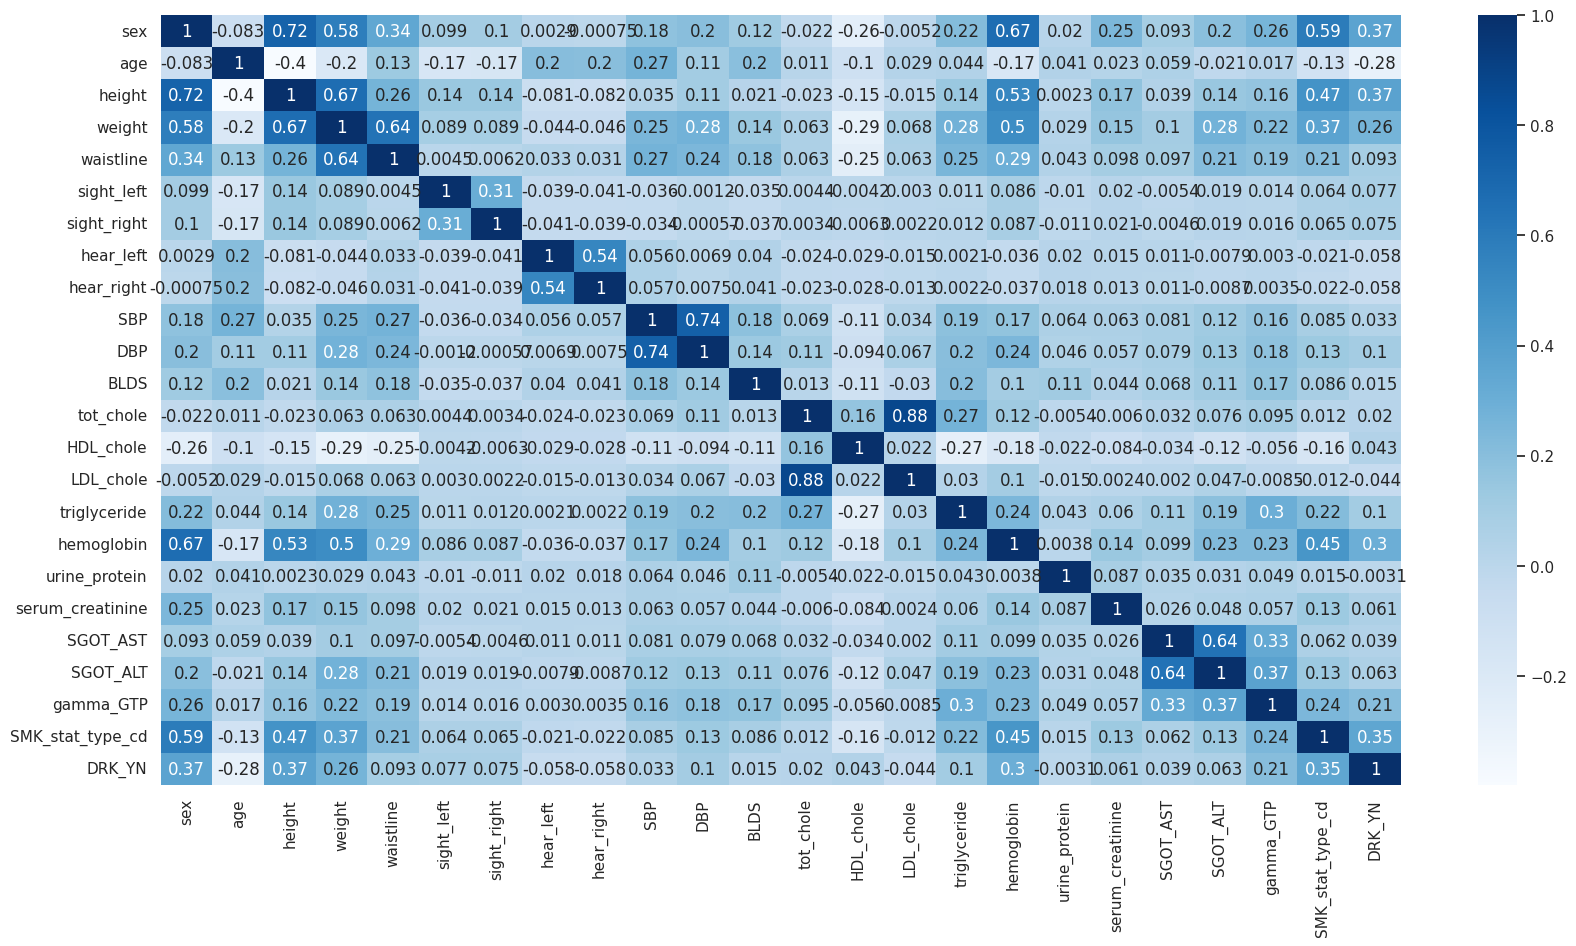

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, cmap="Blues", cbar=True)

In [ ]:
data.drop(["sight_left", "sight_right", "BLDS", "HDL_chole", "triglyceride", "urine_protein", "serum_creatinine"], axis=1, inplace=True)
data

sex  age  height  weight  waistline  hear_left  hear_right    SBP  \
0         1   35     170      75       90.0        1.0         1.0  120.0   
1         1   30     180      80       89.0        1.0         1.0  130.0   
2         1   40     165      75       91.0        1.0         1.0  120.0   
3         1   50     175      80       91.0        1.0         1.0  145.0   
4         1   50     165      60       80.0        1.0         1.0  138.0   
...     ...  ...     ...     ...        ...        ...         ...    ...   
991341    1   45     175      80       92.1        1.0         1.0  114.0   
991342    1   35     170      75       86.0        1.0         1.0  119.0   
991343    0   40     155      50       68.0        1.0         1.0  110.0   
991344    1   25     175      60       72.0        1.0         1.0  119.0   
991345    1   50     160      70       90.5        1.0         1.0  133.0   

         DBP  tot_chole  LDL_chole  hemoglobin  SGOT_AST  SGOT_ALT  gamma_GTP  \
0       80.0      193.0      126.0        17.1      21.0      35.0       40.0   
1       82.0      228.0      148.0        15.8      20.0      36.0       27.0   
2       70.0      136.0       74.0        15.8      47.0      32.0       68.0   
3       87.0      201.0      104.0        17.6      29.0      34.0       18.0   
4       82.0      199.0      117.0        13.8      19.0      12.0       25.0   
...      ...        ...        ...         ...       ...       ...        ...   
991341  80.0      198.0      125.0        15.0      26.0      36.0       27.0   
991342  83.0      133.0       84.0        15.8      14.0      17.0       15.0   
991343  70.0      205.0       77.0        14.3      30.0      27.0       17.0   
991344  74.0      122.0       73.0        14.5      21.0      14.0       17.0   
991345  79.0      225.0      153.0        15.8      24.0      43.0       36.0   

        SMK_stat_type_cd  DRK_YN  
0                    1.0       1  
1                    3.0       0  
2                    1.0       0  
3                    1.0       0  
4                    1.0       0  
...                  ...     ...  
991341               1.0       0  
991342               1.0       0  
991343               3.0       1  
991344               1.0       0  
991345               3.0       1  

[991346 rows x 17 columns]

In [ ]:
X = data.iloc[:, :-1]
y = data["DRK_YN"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f"Train = {X_train.shape}")
print(f"Test = {X_test.shape}")

Train = (793076, 16)
Test = (198270, 16)


### DATA PREPROCESSING

In [ ]:
# Normalized

X_train = (X_train - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))
X_test = (X_test - X_test.min(axis=0)) / (X_test.max(axis=0) - X_test.min(axis=0))
y_train = (y_train - y_train.min(axis=0)) / (y_train.max(axis=0) - y_train.min(axis=0))
X_train

sex       age    height    weight  waistline  hear_left  hear_right  \
287777  1.0  0.076923  0.833333  0.521739   0.077699        0.0         0.0   
262143  1.0  0.615385  0.666667  0.478261   0.083754        0.0         0.0   
459051  0.0  0.307692  0.583333  0.217391   0.060545        0.0         0.0   
722469  1.0  0.153846  0.666667  0.565217   0.094854        0.0         0.0   
387345  1.0  0.000000  0.666667  0.347826   0.074672        0.0         0.0   
...     ...       ...       ...       ...        ...        ...         ...   
352238  1.0  0.692308  0.583333  0.304348   0.074672        0.0         0.0   
795231  1.0  0.461538  0.666667  0.434783   0.082745        0.0         0.0   
39852   1.0  0.000000  0.583333  0.304348   0.061453        0.0         0.0   
200368  1.0  0.000000  0.583333  0.434783   0.080727        0.0         0.0   
484695  0.0  0.153846  0.583333  0.304348   0.070636        0.0         0.0   

             SBP       DBP  tot_chole  LDL_chole  hemoglobin  SGOT_AST  \
287777  0.237864  0.287582   0.079084   0.025596    0.641667  0.002300   
262143  0.296117  0.254902   0.060933   0.020907    0.600000  0.002000   
459051  0.233010  0.248366   0.062662   0.018953    0.525000  0.004701   
722469  0.247573  0.287582   0.080380   0.028136    0.575000  0.002100   
387345  0.247573  0.261438   0.058773   0.014654    0.579167  0.001400   
...          ...       ...        ...        ...         ...       ...   
352238  0.174757  0.176471   0.044944   0.013873    0.587500  0.004101   
795231  0.364078  0.326797   0.095506   0.028918    0.533333  0.003101   
39852   0.296117  0.300654   0.047105   0.016217    0.575000  0.001700   
200368  0.344660  0.267974   0.054019   0.014068    0.650000  0.003601   
484695  0.160194  0.248366   0.039758   0.013873    0.508333  0.001400   

        SGOT_ALT  gamma_GTP  SMK_stat_type_cd  
287777  0.003884   0.027054               1.0  
262143  0.002219   0.015030               0.0  
459051  0.007491   0.011022               1.0  
722469  0.004300   0.100200               0.5  
387345  0.001526   0.044088               1.0  
...          ...        ...               ...  
352238  0.003745   0.018036               0.5  
795231  0.003468   0.028056               1.0  
39852   0.001526   0.012024               0.0  
200368  0.010681   0.036072               1.0  
484695  0.001387   0.010020               0.0  

[793076 rows x 16 columns]

### MODELING

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
X_test[:5]

sex       age    height    weight  waistline  hear_left  hear_right  \
335719  0.0  0.615385  0.250000  0.272727   0.058824        0.0         0.0   
570829  1.0  0.230769  0.750000  0.409091   0.053664        0.0         0.0   
437538  1.0  0.615385  0.583333  0.318182   0.057792        0.0         0.0   
845560  0.0  0.384615  0.500000  0.318182   0.047472        0.0         0.0   
619408  0.0  0.538462  0.333333  0.227273   0.061920        0.0         0.0   

             SBP       DBP  tot_chole  LDL_chole  hemoglobin  SGOT_AST  \
335719  0.286624  0.295082   0.089875   0.081247    0.600000  0.013645   
570829  0.286624  0.303279   0.099545   0.080690    0.714286  0.013645   
437538  0.280255  0.360656   0.091013   0.069560    0.704762  0.016894   
845560  0.101911  0.114754   0.097270   0.080690    0.547619  0.013645   
619408  0.299363  0.262295   0.087600   0.075125    0.600000  0.019493   

        SGOT_ALT  gamma_GTP  SMK_stat_type_cd  
335719  0.003454   0.021042               0.0  
570829  0.005613   0.133267               1.0  
437538  0.007124   0.045090               1.0  
845560  0.004534   0.016032               0.0  
619408  0.006477   0.028056               0.0

In [ ]:
y_test[:5]

335719    0
570829    1
437538    1
845560    1
619408    0
Name: DRK_YN, dtype: int64

In [ ]:
y_pred = model.predict(X_test)
y_pred[:10]

array([0., 1., 0., 1., 0., 0., 0., 0., 0., 1.])

In [ ]:
results = pd.DataFrame({
    "y_aktual" : np.asarray(y_test),
    "y_pred" : y_pred
})
results[:10]

y_aktual  y_pred
0         0     0.0
1         1     1.0
2         1     0.0
3         1     1.0
4         0     0.0
5         0     0.0
6         0     0.0
7         0     0.0
8         1     0.0
9         1     1.0

In [ ]:
# Using DecisionTree Models

model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_2 = model2.predict(X_test)
y_pred_2[:10]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
results = pd.DataFrame({
    "y_aktual" : np.asarray(y_test),
    "y_pred_2" : y_pred_2
})
results[:10]

y_aktual  y_pred_2
0         0       0.0
1         1       0.0
2         1       1.0
3         1       0.0
4         0       0.0
5         0       0.0
6         0       0.0
7         0       0.0
8         1       0.0
9         1       1.0

### EVALUATION

In [ ]:
acc_random = accuracy_score(y_test, y_pred)
print(f"Accuracy Model RandomForest = {acc_random}")

Accuracy Model RandomForest = 0.6593685378524234


In [ ]:
acc_decision = accuracy_score(y_test, y_pred_2)
print(f"Accuracy Model Decision Tree = {acc_decision}")

Accuracy Model Decision Tree = 0.5330458465728551


In [ ]:
# Cross Validation using Grid Search

para_grid = [
    {"n_estimators":[10,20,30,40,50], "max_depth":[2,4,6,8,10]},
    {"bootstrap":[False], "n_estimators":[2,4,6,8], "max_depth":[2,4,6]}
]

grid_search = GridSearchCV(model, para_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_test, y_test)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [2, 4, 6, 8, 10],
                          'n_estimators': [10, 20, 30, 40, 50]},
                         {'bootstrap': [False], 'max_depth': [2, 4, 6],
                          'n_estimators': [2, 4, 6, 8]}],
             scoring='neg_mean_squared_error')

In [ ]:
# Print result best param

grid_search.best_params_

{'max_depth': 10, 'n_estimators': 50}

In [ ]:
cvres = grid_search.cv_results_
for mean_scores, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_scores), params)

0.550926902509773 {'max_depth': 2, 'n_estimators': 10}
0.5497584259726508 {'max_depth': 2, 'n_estimators': 20}
0.5490148078994622 {'max_depth': 2, 'n_estimators': 30}
0.5529190478228273 {'max_depth': 2, 'n_estimators': 40}
0.5490194012239096 {'max_depth': 2, 'n_estimators': 50}
0.5426296769050997 {'max_depth': 4, 'n_estimators': 10}
0.5414665819918442 {'max_depth': 4, 'n_estimators': 20}
0.5420251790269043 {'max_depth': 4, 'n_estimators': 30}
0.5419926100118986 {'max_depth': 4, 'n_estimators': 40}
0.5428016032318574 {'max_depth': 4, 'n_estimators': 50}
0.5339580620082992 {'max_depth': 6, 'n_estimators': 10}
0.5339013845787787 {'max_depth': 6, 'n_estimators': 20}
0.5333011792395383 {'max_depth': 6, 'n_estimators': 30}
0.5339722304256928 {'max_depth': 6, 'n_estimators': 40}
0.533263348411709 {'max_depth': 6, 'n_estimators': 50}
0.5270606309144217 {'max_depth': 8, 'n_estimators': 10}
0.527347633257718 {'max_depth': 8, 'n_estimators': 20}
0.5261555502754782 {'max_depth': 8, 'n_estimators':

In [ ]:
# We use best param from gridsearch

model_grid = RandomForestClassifier(n_estimators=50, max_depth=10)
model_grid.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [ ]:
y_pred_grid = model_grid.predict(X_test)

In [ ]:
acc_grid = accuracy_score(y_test, y_pred_grid)
print(f"Accuracy {acc_grid}")

Accuracy 0.7174610379785141


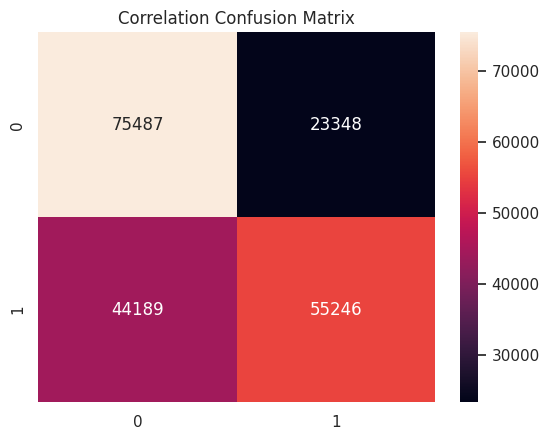

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".5g").set(title="Correlation Confusion Matrix");

In [ ]:
TP = confusion_matrix(y_test, y_pred_grid)[0][0]
TN = confusion_matrix(y_test, y_pred_grid)[1][1]
FP = confusion_matrix(y_test, y_pred_grid)[0][1]
FN = confusion_matrix(y_test, y_pred_grid)[1][0]

In [ ]:
# Formula Accuracy
acc_grid = (TP + TN ) / (TP + FP + FN + TN)
print(f"Accuracy GridSearch = {acc_grid}")

Accuracy GridSearch = 0.7174610379785141


In [ ]:
# Formula Precission
prec = (TP) / (TP + FP)
print(f"Precission GridSearch = {prec}")

Precission GridSearch = 0.7433500278241514


In [ ]:
# Formula Recall

rec = (TP) / (TP + FN)
print(f"Recall GridSearch = {rec}")

Recall GridSearch = 0.7056049634083095


In [ ]:
# Formula Specificity

spec = (TN)/ (TN + FP)
print(f"Specificity GridSearch = {spec}")

Specificity GridSearch = 0.7305731401622977


In [ ]:
X_test.head()

sex       age    height    weight  waistline  hear_left  hear_right  \
335719  0.0  0.615385  0.250000  0.272727   0.058824        0.0         0.0   
570829  1.0  0.230769  0.750000  0.409091   0.053664        0.0         0.0   
437538  1.0  0.615385  0.583333  0.318182   0.057792        0.0         0.0   
845560  0.0  0.384615  0.500000  0.318182   0.047472        0.0         0.0   
619408  0.0  0.538462  0.333333  0.227273   0.061920        0.0         0.0   

             SBP       DBP  tot_chole  LDL_chole  hemoglobin  SGOT_AST  \
335719  0.286624  0.295082   0.089875   0.081247    0.600000  0.013645   
570829  0.286624  0.303279   0.099545   0.080690    0.714286  0.013645   
437538  0.280255  0.360656   0.091013   0.069560    0.704762  0.016894   
845560  0.101911  0.114754   0.097270   0.080690    0.547619  0.013645   
619408  0.299363  0.262295   0.087600   0.075125    0.600000  0.019493   

        SGOT_ALT  gamma_GTP  SMK_stat_type_cd  
335719  0.003454   0.021042               0.0  
570829  0.005613   0.133267               1.0  
437538  0.007124   0.045090               1.0  
845560  0.004534   0.016032               0.0  
619408  0.006477   0.028056               0.0

In [ ]:
y_pred_grid = model_grid.predict(X_test)
y_pred_grid

array([0., 1., 1., ..., 0., 1., 1.])

In [ ]:
final_results = pd.DataFrame({
    "y_aktual":y_test,
    "y_pred":y_pred_grid
})
final_results[:20]

y_aktual  y_pred
335719         0     0.0
570829         1     1.0
437538         1     1.0
845560         1     0.0
619408         0     0.0
753082         0     0.0
377199         0     0.0
152476         0     0.0
559453         1     0.0
307051         1     1.0
878618         0     0.0
462935         0     0.0
503314         0     0.0
744468         0     0.0
66198          0     1.0
300885         1     1.0
639489         1     0.0
314857         0     1.0
216794         1     0.0
556644         0     0.0

In [ ]:
y_train

287777    1.0
262143    0.0
459051    0.0
722469    1.0
387345    1.0
         ... 
352238    0.0
795231    0.0
39852     1.0
200368    1.0
484695    1.0
Name: DRK_YN, Length: 793076, dtype: float64

In [ ]:
# Using deeplearning

es = EarlyStopping(monitor="accuracy", mode="max", verbose=1, patience=5)

model_deep = Sequential([
    layers.Dense(256, activation="relu", input_shape=(len(X_test.columns),)),
    layers.Dropout(0.5),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

optimizer = keras.optimizers.Adam()
model_deep.compile(optimizer=optimizer,
              loss="binary_crossentropy", metrics=["acc"]
)

history = model_deep.fit(X_train.values, y_train, validation_data=(X_test, y_test), callbacks=[es], epochs=20)

Epoch 1/20
24784/24784 [==============================] - 88s 3ms/step - loss: 0.5583 - acc: 0.7145 - val_loss: 0.5805 - val_acc: 0.6970
Epoch 2/20
24784/24784 [==============================] - 94s 4ms/step - loss: 0.5510 - acc: 0.7185 - val_loss: 0.5656 - val_acc: 0.6931
Epoch 3/20
24784/24784 [==============================] - 85s 3ms/step - loss: 0.5483 - acc: 0.7207 - val_loss: 0.5774 - val_acc: 0.6741
Epoch 4/20
24784/24784 [==============================] - 95s 4ms/step - loss: 0.5466 - acc: 0.7220 - val_loss: 0.5858 - val_acc: 0.6559
Epoch 6/20
24784/24784 [==============================] - 94s 4ms/step - loss: 0.5461 - acc: 0.7222 - val_loss: 0.6087 - val_acc: 0.6266
Epoch 7/20
24784/24784 [==============================] - 94s 4ms/step - loss: 0.5453 - acc: 0.7220 - val_loss: 0.5683 - val_acc: 0.6889
Epoch 8/20
 2300/24784 [=>............................] - ETA: 1:05 - loss: 0.5477 - acc: 0.7207

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



24784/24784 [==============================] - 95s 4ms/step - loss: 0.5454 - acc: 0.7230 - val_loss: 0.5944 - val_acc: 0.6495
Epoch 9/20
24784/24784 [==============================] - 87s 3ms/step - loss: 0.5450 - acc: 0.7230 - val_loss: 0.5893 - val_acc: 0.6770
Epoch 10/20
24784/24784 [==============================] - 86s 3ms/step - loss: 0.5450 - acc: 0.7229 - val_loss: 0.6038 - val_acc: 0.6415
Epoch 11/20
24784/24784 [==============================] - 95s 4ms/step - loss: 0.5455 - acc: 0.7231 - val_loss: 0.5941 - val_acc: 0.6549
Epoch 12/20
24784/24784 [==============================] - 95s 4ms/step - loss: 0.5451 - acc: 0.7230 - val_loss: 0.5853 - val_acc: 0.6587
Epoch 13/20
24784/24784 [==============================] - 85s 3ms/step - loss: 0.5450 - acc: 0.7234 - val_loss: 0.5860 - val_acc: 0.6630
Epoch 14/20
24784/24784 [==============================] - 90s 4ms/step - loss: 0.5448 - acc: 0.7232 - val_loss: 0.5871 - val_acc: 0.6798
Epoch 15/20
24784/24784 [======================

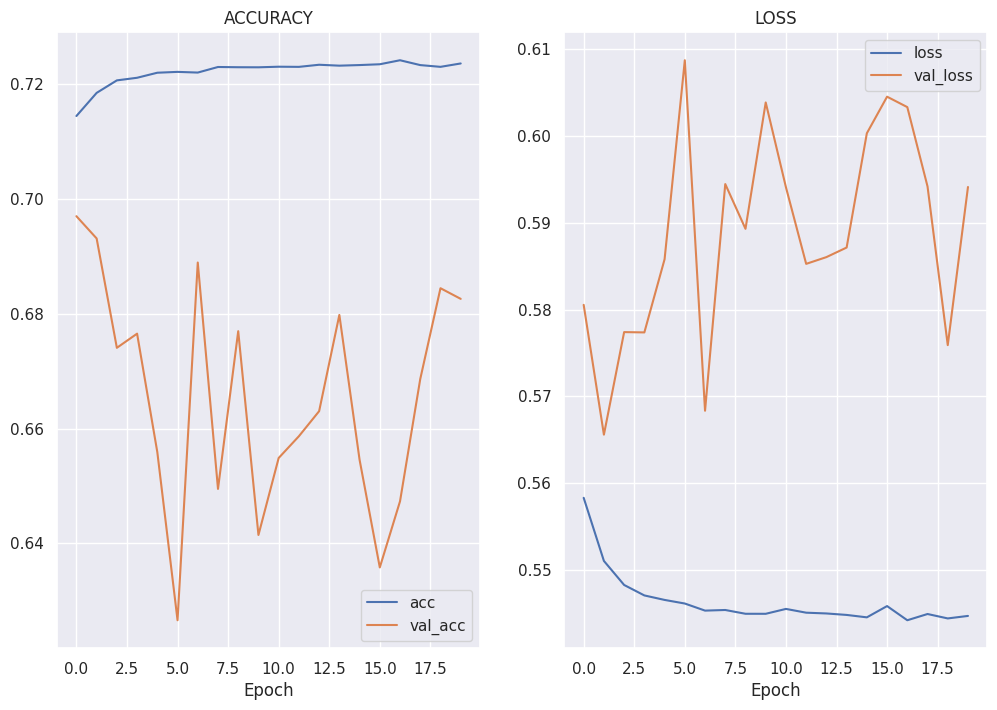

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,8))
ax1.plot(history.history["acc"], label="acc")
ax1.plot(history.history["val_acc"], label="val_acc")
ax1.set_title("ACCURACY")
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(history.history["loss"], label="loss")
ax2.plot(history.history["val_loss"], label="val_loss")
ax2.set_title("LOSS")
ax2.set_xlabel("Epoch")
ax2.legend()
plt.show()

In [ ]:
loss, acc_deep = model_deep.evaluate(X_test, y_test)
print(f"LOSS = {loss}")
print(f"ACCURACY = {acc_deep}")

6196/6196 [==============================] - 15s 2ms/step - loss: 0.5941 - acc: 0.6826
LOSS = 0.5941122174263
ACCURACY = 0.6826045513153076


In [ ]:
X_test

sex       age    height    weight  waistline  hear_left  hear_right  \
335719  0.0  0.615385  0.250000  0.272727   0.058824        0.0         0.0   
570829  1.0  0.230769  0.750000  0.409091   0.053664        0.0         0.0   
437538  1.0  0.615385  0.583333  0.318182   0.057792        0.0         0.0   
845560  0.0  0.384615  0.500000  0.318182   0.047472        0.0         0.0   
619408  0.0  0.538462  0.333333  0.227273   0.061920        0.0         0.0   
...     ...       ...       ...       ...        ...        ...         ...   
752592  1.0  0.692308  0.583333  0.500000   0.067079        0.0         0.0   
96057   1.0  0.769231  0.500000  0.272727   0.050568        0.0         0.0   
442177  1.0  0.769231  0.583333  0.363636   0.052632        0.0         0.0   
447968  0.0  0.307692  0.416667  0.272727   0.047988        0.0         0.0   
848192  1.0  0.692308  0.500000  0.409091   0.060888        0.0         0.0   

             SBP       DBP  tot_chole  LDL_chole  hemoglobin  SGOT_AST  \
335719  0.286624  0.295082   0.089875   0.081247    0.600000  0.013645   
570829  0.286624  0.303279   0.099545   0.080690    0.714286  0.013645   
437538  0.280255  0.360656   0.091013   0.069560    0.704762  0.016894   
845560  0.101911  0.114754   0.097270   0.080690    0.547619  0.013645   
619408  0.299363  0.262295   0.087600   0.075125    0.600000  0.019493   
...          ...       ...        ...        ...         ...       ...   
752592  0.299363  0.245902   0.043800   0.034502    0.638095  0.010396   
96057   0.292994  0.327869   0.056314   0.030050    0.714286  0.012346   
442177  0.382166  0.254098   0.048919   0.042293    0.419048  0.010396   
447968  0.229299  0.278689   0.064846   0.048971    0.576190  0.019493   
848192  0.452229  0.475410   0.106371   0.085698    0.738095  0.019493   

        SGOT_ALT  gamma_GTP  SMK_stat_type_cd  
335719  0.003454   0.021042               0.0  
570829  0.005613   0.133267               1.0  
437538  0.007124   0.045090               1.0  
845560  0.004534   0.016032               0.0  
619408  0.006477   0.028056               0.0  
...          ...        ...               ...  
752592  0.004750   0.036072               1.0  
96057   0.006477   0.028056               1.0  
442177  0.003670   0.094188               0.5  
447968  0.002807   0.003006               0.5  
848192  0.010579   0.087174               0.5  

[198270 rows x 16 columns]

In [ ]:
y_pred_deep = model_deep.predict(X_test)

6196/6196 [==============================] - 9s 1ms/step


In [ ]:
# Change typedata results predict to round
y_pred_deep = y_pred_deep.round().flatten()
y_pred_deep

array([0., 1., 1., ..., 0., 0., 1.], dtype=float32)

In [ ]:
pd.DataFrame({
    "y_aktual":y_test,
    "y_pred_deep":y_pred_deep
})

y_aktual  y_pred_deep
335719         0          0.0
570829         1          1.0
437538         1          1.0
845560         1          0.0
619408         0          0.0
...          ...          ...
752592         1          0.0
96057          1          0.0
442177         1          0.0
447968         1          0.0
848192         1          1.0

[198270 rows x 2 columns]

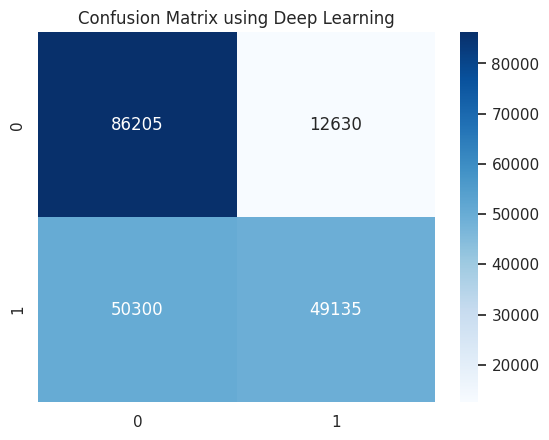

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_deep), annot=True, cmap="Blues", fmt=".5g").set(title="Confusion Matrix using Deep Learning");

In [ ]:
# Compared Model

pd.DataFrame({
    "random_forest": [acc_random],
    "desicion_tree": [acc_decision],
    "random_forest_grid": [acc_grid],
    "deep_learning" :[acc_deep]
}, index=["accuracy"]).T

accuracy
random_forest       0.659369
desicion_tree       0.533046
random_forest_grid  0.717461
deep_learning       0.682605

#### NOTE:

We know that using the gridsearch model improves, increasing 3% from the normal model. However, each model has its own advantages, for example we want to find a good precision, recall, or specificity value. It could be that the deicision tree, or randomforest model without using gridsearch will produce good values compared to using the gridsearch technique.
The final result of the deep learning training model is overfitting, to improve it we can add more data or use hyperparameters such as gridsearch.